In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image, display
import math

In [2]:
def redimensioner(image1):
    dim=(128,128)
    image1=cv2.resize(image1,dim)
    return image1


In [3]:
def face(image,k):
    face_cascade = cv2.CascadeClassifier("opencv-4.x\opencv-4.x/data/haarcascades/haarcascade_frontalface_default.xml")
    face1 = face_cascade.detectMultiScale(image)
    for i,[x,y,w,h] in enumerate (face1):
        face_image = image[y:y + h, x:x + w]
        file_name = "image"+str(k)+".jpg ".format(i)
        file_path = file_name
    return face_image,file_path 

In [5]:
# read and detect face of all images
def read_face(nb_img):
    for i in range(nb_img):
        
        image=cv2.imread('img'+str(i+1)+'.jpg',0)
       
        
        face_image,file_path =face(image,i+1)
        face_image=redimensioner(face_image)
        plt.imshow(face_image,cmap='gray')
        cv2.imwrite(file_path, face_image)


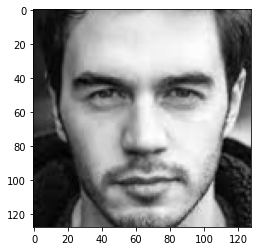

In [6]:

read_face(5)

In [18]:
def diviser_8x8(image):
    n=8
    height,width=np.shape(image)
    height=int(height/n)
    width=int(width/n)

    tab_8x8=image.reshape((height,width,n,n))
    return tab_8x8

In [7]:
def dupliquer(matrice_8x8):
    height,width=np.shape(matrice_8x8)
    height_inter=height+2
    width_inter=width+2
    inter=np.zeros((height_inter,width_inter))
    
    #la premiere ligne 
    inter[0][0]=matrice_8x8[0][0]
    inter[0][width_inter-1]=matrice_8x8[0][width-1]
    i=1
    j=0

    while j<width:
        inter[0][i]=matrice_8x8[0][j]
        i+=1
        j+=1

    #la derniere ligne 
    inter[height_inter-1][0]=matrice_8x8[height-1][0]
    inter[height_inter-1][width_inter-1]=matrice_8x8[height-1][width-1]
    i=1
    j=0
    while j <width:    
        inter[height_inter-1][i]=matrice_8x8[height-1][j]
        i=i+1
        j+=1

    #premiere colonne 
    i=1
    j=0
    while j<height:
        inter[i][0]=matrice_8x8[j][0]
        i+=1
        j+=1

    #derniere colonne 

    i=1
    j=0

    while j< height :
        inter[i][width_inter-1] = matrice_8x8 [j][width-1]
        i=i+1
        j=j+1

    height_inter-=1
    width_inter-=1
    i=1
    j=1
    k=0
    l=0


    while (i<height_inter):
        j=1 
        l=0
        while(j<width_inter):
            inter[i] [j]=matrice_8x8[k][l]
            j+=1
            l+=1
        i+=1
        k+=1   
    return inter        

In [8]:
def histogramme (tab_8x8):
    hist =np.zeros(256)
    height,width=np.shape(tab_8x8)
    for i in range(256):
        somme =0 
        for j in range(height):
            for k in range(width):
                if int(int(tab_8x8[j][k]))==int(i) :
                    somme=somme+1
                    

        hist[i]=int(somme)
    return hist    

In [9]:
def descimage(liste_image):

    height ,width, height_matrice , width_matrice =np.shape(liste_image)
    tab_desc =np.zeros((height,width,height_matrice,width_matrice))
    hist =np.zeros((height*width,256))
   
    i_hist=0
    
    for i in range(height):
        for j in range(width):
            dup =dupliquer(liste_image[i][j])
            inter_desc =descripteur(dup) 
            x=histogramme(inter_desc)

            j_hist=0
            for k in range(256):
               hist[i_hist][j_hist]=x[k]
               j_hist+=1
            i_hist+=1
            
            tab_desc[i][j]=inter_desc
    return tab_desc,hist          

In [10]:
def descripteur (matrice):
    i=1
    height,width=np.shape(matrice)
    height=height-1
    width=width-1
    liste=np.zeros (64)

    nb_pixel=0

    while i<height :
        
        j=1
        while j<width :
            
            desc=np.zeros((8))
            k=0
            
            if matrice[i][j]>=matrice[i-1][j-1] :
                desc[k]=1
                
            else :
                desc[k]=0
            k+=1

            if matrice[i][j]>=matrice[i-1][j] :
                desc[k]=1
                
            else :
                desc[k]=0
            k+=1    
            if matrice[i][j]>=matrice[i-1][j+1] :
                desc[k]=1
                
            else :
                desc[k]=0
            k+=1     
            if matrice[i][j]>=matrice[i][j+1] :
                desc[k]=1
                
            else :
                desc[k]=0
            k+=1  

            if matrice[i][j]>=matrice[i+1][j+1] :
                desc[k]=1
                
            else :
                desc[k]=0
            k+=1  

            if matrice[i][j]>=matrice[i+1][j] :
                desc[k]=1
                
            else :
                desc[k]=0
            k+=1      

            if matrice[i][j]>=matrice[i+1][j-1] :
                desc[k]=1
                

            else :
                desc[k]=0
            k+=1
            if matrice[i][j]>=matrice[i][j-1] :
                desc[k]=1
                

            else :
                desc[k]=0
            k+=1 

            
            taille =np.shape(desc)[0]
            
            somme=0
            x=0
            while (x < taille) :
              somme=somme+ (2**x)*desc[x]
              x+=1

         

            liste[nb_pixel]=int(somme) 
            
            nb_pixel+=1
            j=j+1
        
        i=i+1

    liste=liste.reshape((8,8))
    
    return liste       
    

In [11]:
def MSE(hist_img1,hist_img2):
    height ,width=np.shape(hist_img1)
    n=float(height*width)
    mse=0

    for i in range(height):
        for j in range(width):
            
            diff=float(hist_img1[i][j]-hist_img2[i][j])
            diff=diff**2
            
            mse=mse+diff
    mse=mse/n        
   
    return mse
    

In [12]:

def main_function(nb):
    liste_hist= []
    for i in range( nb):
        image=cv2.imread('image'+str(i+1)+'.jpg',0)
        tab_8x8=diviser_8x8(image)
        desc,hist=descimage(tab_8x8)
        liste_hist.append(hist)
        
        np.savetxt("histogram"+str(i+1)+".csv", hist, delimiter=",")

    liste=[]    
    i=1
    while (i<=nb):
        j=1
        
        min=10000 #la val de mse min
        min_img=-1 # 
        hist1= np.genfromtxt('histogram'+str(i)+'.csv', delimiter=',')
        while (j<=nb):
            if i!=j:
                
                hist2=np.genfromtxt('histogram'+str(j)+'.csv',delimiter=',')
                mse=MSE (hist1,hist2)
                #print(mse)
                if mse <min :
                   min_img=j
                   min=mse
            j+=1    
        liste.append([i,min_img,min])    
        i+=1  
        #sauvegarder l'image qui ressemble le plus a l'image i  et le mse  
    return liste,liste_hist   

In [10]:

liste,liste_hist=main_function(4)
for img in liste:
    display(Image(filename = 'image'+str(img[0])+'.jpg')) 
    display(Image(filename = 'image'+str(img[1])+'.jpg'))
    
    print("-----------------------------------------------------")
print(liste)

NameError: name 'main_function' is not defined